Imports:

In [318]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

In [319]:
%run ./Dados.ipynb
%run ./Funcoes.ipynb

Funções:

In [320]:
# Função que faz o processamento dos dados para a criação dos gráficos de quantidade de alunos matriculados.
def ProcessamentoQuantidade(df):
    copia_df = df.copy()
    try:
        copia_df = ParteDataFrame(copia_df, ["ANO_INGRESSO", "CURSO", "SEXO"])
        copia_df["AREA"] = GruposDicio(copia_df["CURSO"], cursos_areas)
        copia_df = RemoveColunas(copia_df, "CURSO")
        copia_df = pd.concat([ColLoc(copia_df, "SEXO", "F"), ColLoc(copia_df, "SEXO", "M")])
        return copia_df
    except:
        print("Erro")
        return df

In [321]:
# Função que constrói os gráficos de quantidade.
def QuantidadePlot(df, palette, ax, titulo="", titulo_tamanho=15, despine=False, x="SEXO", hue="SEXO", quant_max = 2800):
    # Gráfico
    grafico = sns.histplot(data=df, x=x, hue=hue, palette=CoresPalette(df[hue], palette), ax=ax)

    # Aparência
    grafico.set(xlabel="Sexo", ylabel="Quantidade")
    grafico.set_title(titulo, fontsize=titulo_tamanho, y=1.05)
    ax.legend(title='Sexo', loc='upper right', labels=['Masculino', 'Feminino'])
    LabelNumeros(coluna=df[x].value_counts(), ax=ax, label="y", fim=quant_max, distancia=200)
    if despine:
        sns.despine(top=True , right=True, left=False, bottom=False)
    
    return grafico

Processamento dos dados:

In [322]:
# Geral
df_quant_geral = pd.concat([df21,df22])
df_quant_geral = ProcessamentoQuantidade(df_quant_geral)

# 2021
df_quant21 = ColLoc(df_quant_geral, "ANO_INGRESSO", 2021)

# 2022
df_quant22 = ColLoc(df_quant_geral, "ANO_INGRESSO", 2022)

# Gráficos de Quantidades:

# 2021

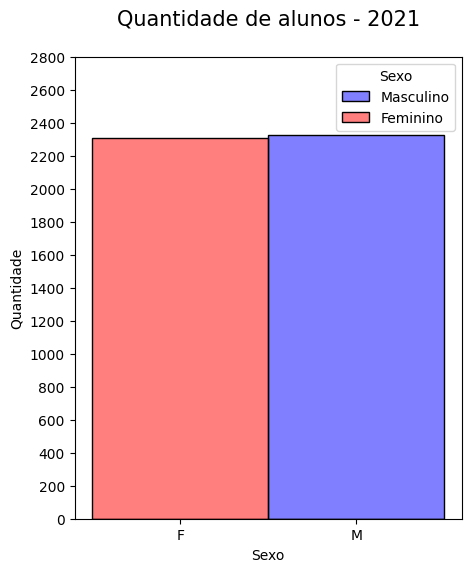

In [323]:
# Cria a figura e o gráfico de quantidade de alunos matriculados no ano de 2021 divididos pelo sexo.

# Figura
quantidade_geral21, pos1 = plt.subplots(nrows = 1, ncols=1, figsize=(5, 6))

# Gráfico
QuantidadePlot(df_quant21, sexo_palette, pos1, titulo="Quantidade de alunos - 2021")

plt.show(quantidade_geral21)

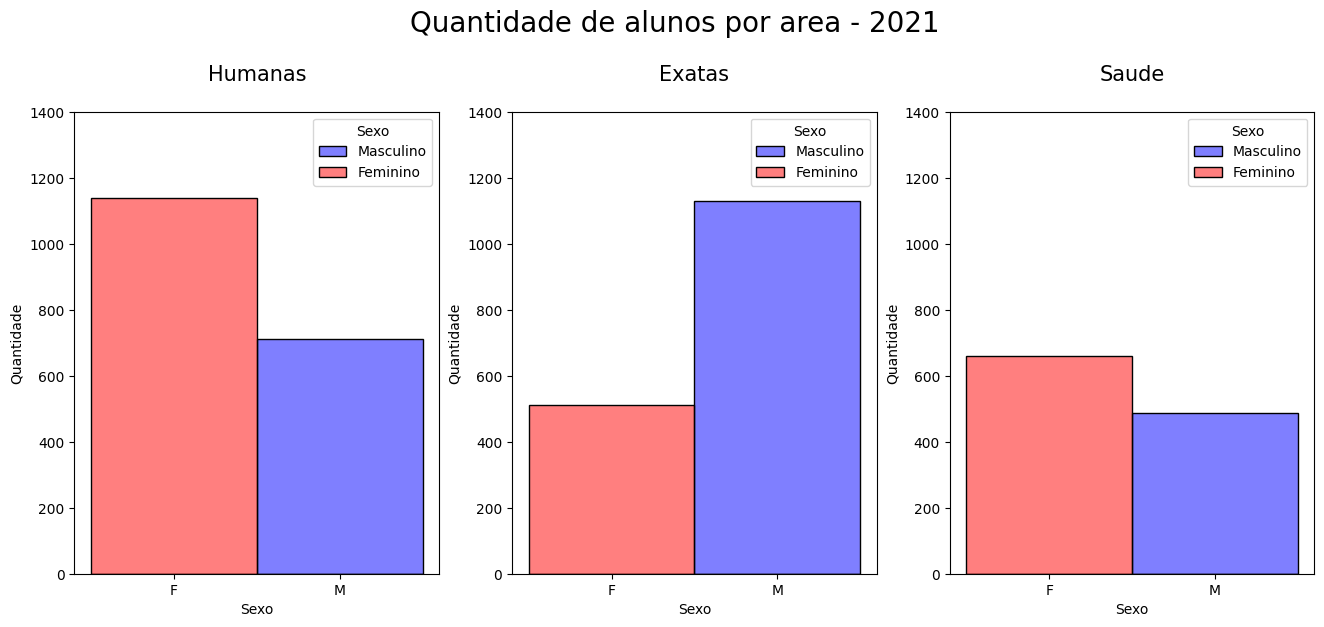

In [324]:
# Cria a figura e o gráfico de quantidade de alunos matriculados no ano de 2021
# comparando a quantidade de alunos de cada sexo por área de ensino.

# Figura
quantidade_area21, pos2 = plt.subplots(nrows = 1, ncols=3, figsize=(16, 6))
quantidade_area21.suptitle("Quantidade de alunos por area - 2021", fontsize=20, y=1.05)

# Gráficos
QuantidadePlot(ColLoc(df_quant21, "AREA", "HUMANAS"), sexo_palette, pos2[0], titulo="Humanas", quant_max=1400)
QuantidadePlot(ColLoc(df_quant21, "AREA", "EXATAS"), sexo_palette, pos2[1], titulo="Exatas", quant_max=1400)
QuantidadePlot(ColLoc(df_quant21, "AREA", "SAUDE"), sexo_palette, pos2[2], titulo="Saude", quant_max=1400)

plt.show(quantidade_area21)

# 2022

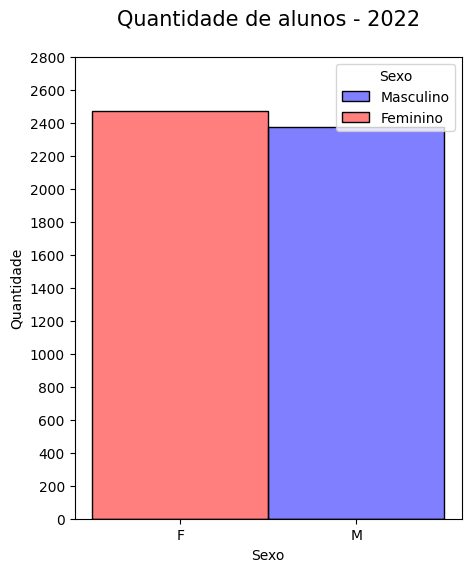

In [325]:
# Cria a figura e o gráfico de quantidade de alunos matriculados no ano de 2022 divididos pelo sexo.

# Figura
quantidade_geral22, pos3 = plt.subplots(nrows = 1, ncols=1, figsize=(5, 6))

# Gráfico
quantidade_geral22 = QuantidadePlot(df_quant22, sexo_palette, pos3, titulo="Quantidade de alunos - 2022")

plt.show(quantidade_geral22)

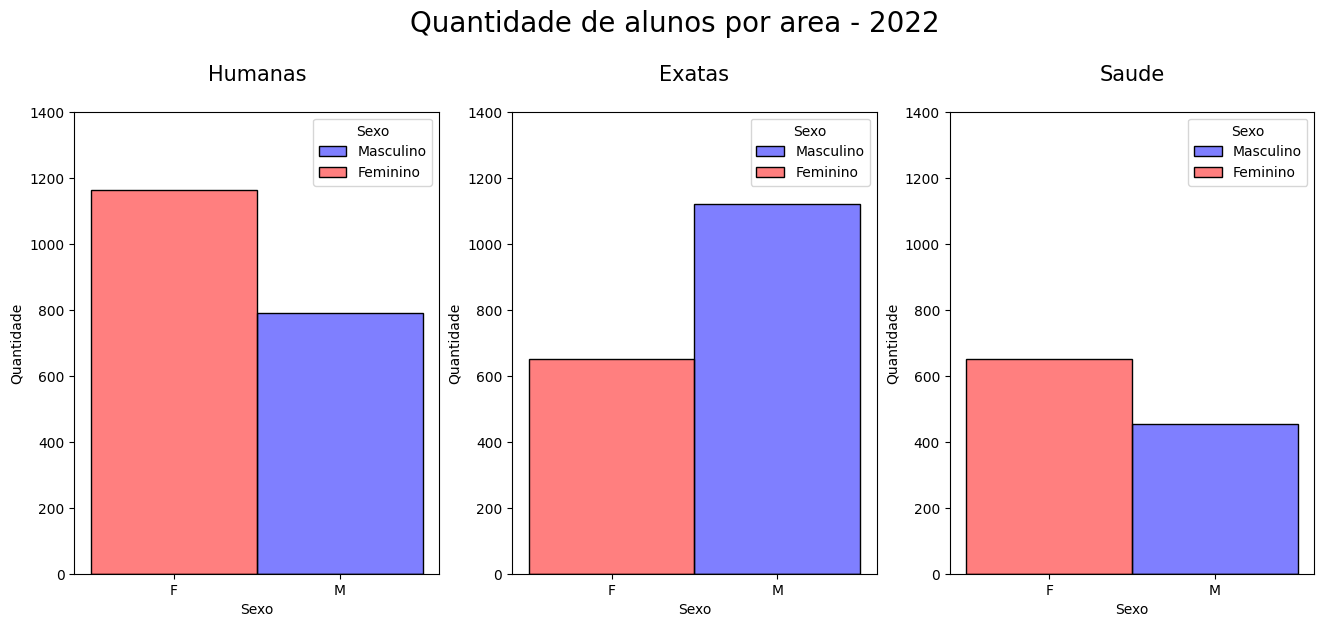

In [326]:
# Cria a figura e o gráfico de quantidade de alunos matriculados no ano de 2022
# comparando a quantidade de alunos de cada sexo por área de ensino.

# Figura
quantidade_area22, pos4 = plt.subplots(nrows = 1, ncols=3, figsize=(16, 6))
quantidade_area22.suptitle("Quantidade de alunos por area - 2022", fontsize=20, y=1.05)

# Gráficos
QuantidadePlot(ColLoc(df_quant22, "AREA", "HUMANAS"), sexo_palette, pos4[0], titulo="Humanas", quant_max=1400)
QuantidadePlot(ColLoc(df_quant22, "AREA", "EXATAS"), sexo_palette, pos4[1], titulo="Exatas", quant_max=1400)
QuantidadePlot(ColLoc(df_quant22, "AREA", "SAUDE"), sexo_palette, pos4[2], titulo="Saude", quant_max=1400)

plt.show(quantidade_area22)